(3602, 2026, 3)


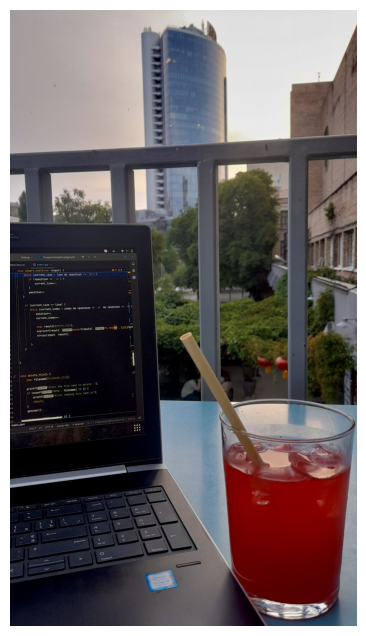

In [9]:
import learn
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.image import imread


def load_image(image_path):
    img = Image.open(image_path)
    img = img.convert('RGB')  # Убедитесь, что изображение в формате RGB
    return np.array(img)

image_path = "/home/anastasiia/Downloads/Telegram Desktop/IMG_0711.JPG" 
image_array = load_image(image_path)

image_raw = imread(image_path)
print(image_raw.shape)



plt.figure(figsize=(8, 8))
plt.imshow(image_array) 
plt.axis('off')  # Отключаем оси
plt.show()



(3602, 2026)
(3602, 2026)


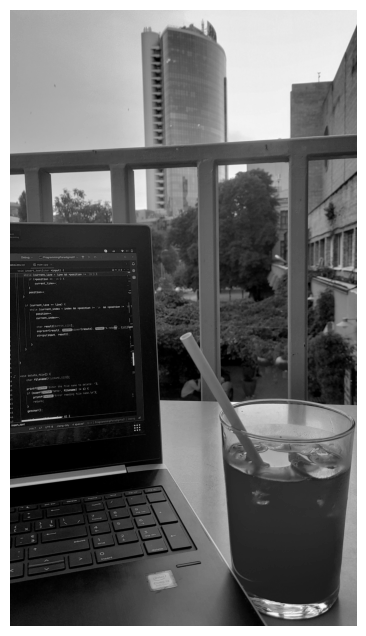

In [10]:
 

image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.shape)



plt.figure(figsize=(8, 8))
plt.imshow(image_bw , cmap='gray') 
plt.axis('off')   
plt.show()

 

In [17]:

pca = PCA()   # PCA (Principal Component Analysis) — це метод, який використовується для зменшення кількості змінних у великому наборі даних, зберігаючи при цьому якомога більше важливої інформації.

#Нові змінні: Ці нові змінні називаються головними компонентами. Вони створюються шляхом комбінування початкових змінних (пікселів) певним чином.

#Уявіть, що у вас є фото з тисячею пікселів. Замість аналізу кожного пікселя окремо, PCA допоможе вам знайти декілька головних компонент, які містять основну інформацію про зображення. Це дозволяє вам зосередитися на важливих частинах даних і ігнорувати менш важливі деталі.


pca.fit(image_bw)  # Метод fit знаходить основні компоненти в даних, які максимізують дисперсію.(дисперсія - розкидка як в проєкті теор ймовірносіт)
 
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) 
#Кумулятивна дисперсія є мірою того, як кожна додаткова точка даних впливає на загальну дисперсію вибірки, коли ці точки додаються одна за одною. Іншими словами, це накопичення дисперсії при поступовому додаванні даних у набір.


 
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
#Цей рядок коду знаходить перший індекс у масиві cumulative_variance, де значення кумулятивної дисперсії стає більшим або дорівнює 0.95 (тобто 95%). np.argmax повертає індекс першого такого елемента. Додаючи 1, ми отримуємо кількість компонент, яка покриває 95% дисперсії (оскільки індексація в масивах починається з 0).


  
print("Number of components to cover 95% variance:", num_components_95)


 
 

Number of components to cover 95% variance: 17


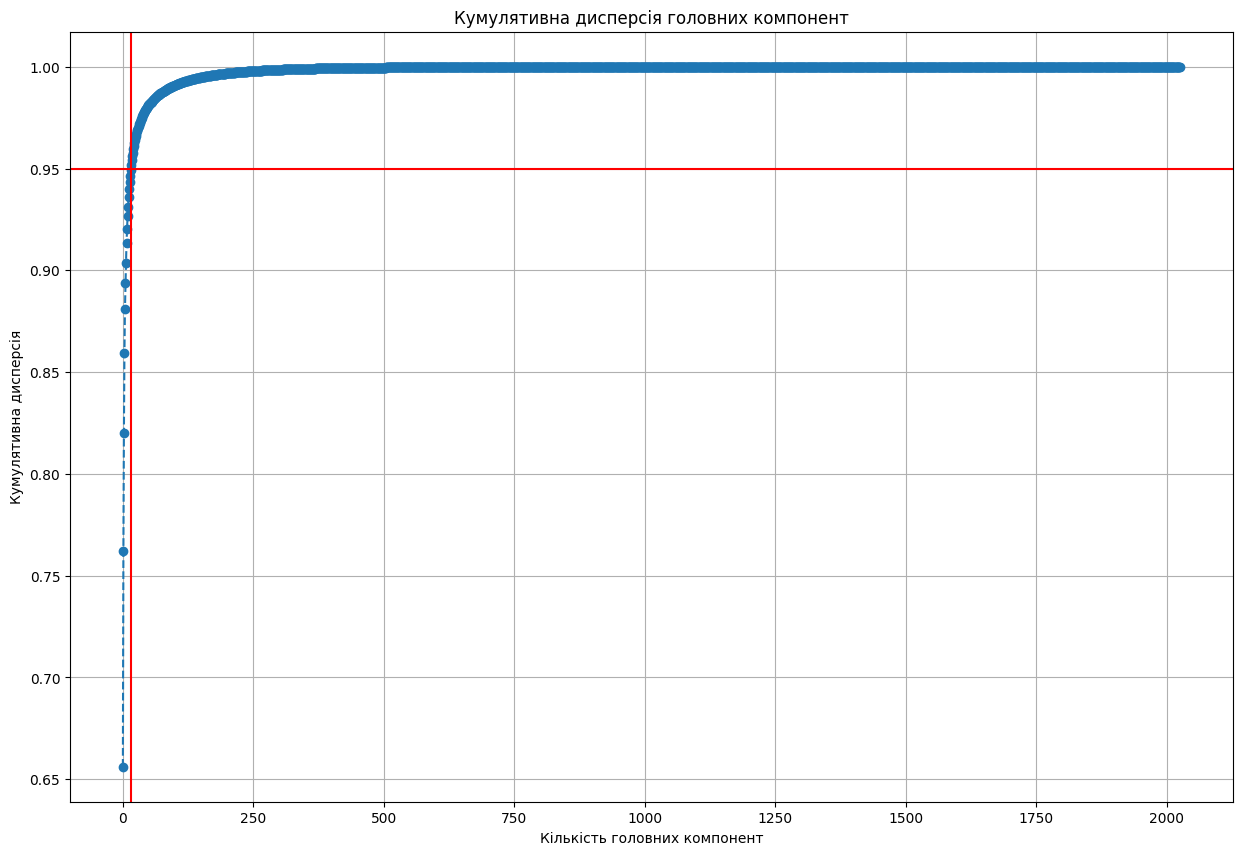

In [16]:
 
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=num_components_95 - 1, color='r', linestyle='-')
plt.title('Кумулятивна дисперсія головних компонент')
plt.xlabel('Кількість головних компонент')
plt.ylabel('Кумулятивна дисперсія')
plt.grid(True)
plt.show()





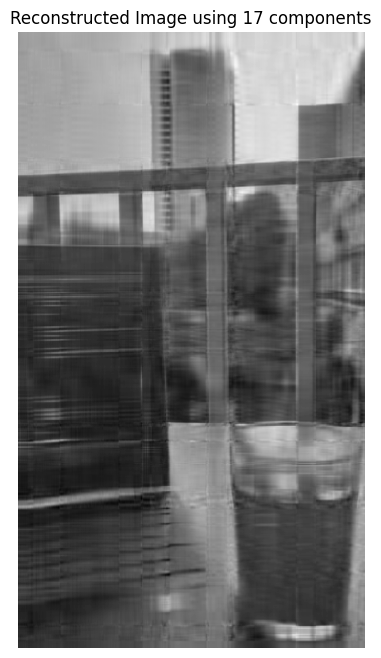

In [19]:

 
pca_reduced = PCA(n_components=num_components_95)
image_bw_transformed = pca_reduced.fit_transform(image_bw)

 
image_bw_reconstructed = pca_reduced.inverse_transform(image_bw_transformed).reshape(image_bw.shape)
# Це перетворення потрібне для того, щоб після аналізу та обробки зображення за допомогою PCA ми могли отримати остаточний результат, який буде відповідати початковому зображенню



 
plt.figure(figsize=(8, 8))
plt.imshow(image_bw_reconstructed, cmap='gray')
plt.axis('off')
plt.title(f'Reconstructed Image using {num_components_95} components')
plt.show()


Number of components to cover 40% variance: 1


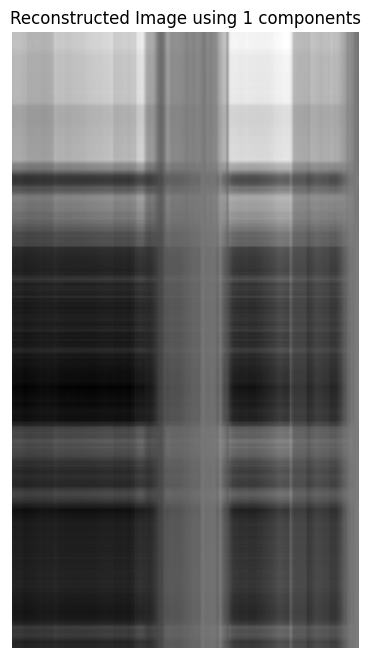

In [20]:


pca = PCA()  
pca.fit(image_bw)  
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)  
num_components_95 = np.argmax(cumulative_variance >= 0.40) + 1  
print("Number of components to cover 40% variance:", num_components_95)


pca_reduced = PCA(n_components=num_components_95)
image_bw_transformed = pca_reduced.fit_transform(image_bw)
image_bw_reconstructed = pca_reduced.inverse_transform(image_bw_transformed).reshape(image_bw.shape)
# Це перетворення потрібне для того, щоб після аналізу та обробки зображення за допомогою PCA ми могли отримати остаточний результат, який буде відповідати початковому зображенню



 
plt.figure(figsize=(8, 8))
plt.imshow(image_bw_reconstructed, cmap='gray')
plt.axis('off')
plt.title(f'Reconstructed Image using {num_components_95} components')
plt.show()






Number of components to cover 99% variance: 93


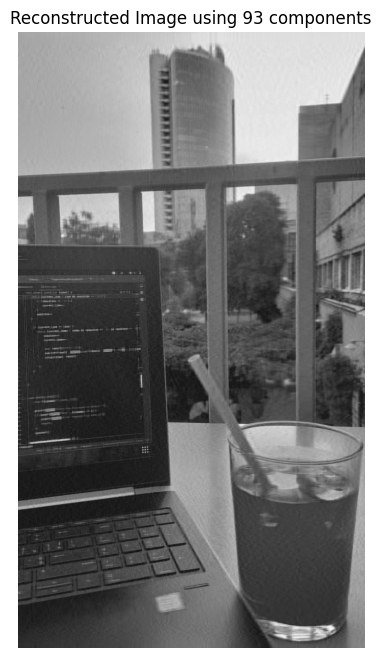

In [22]:


pca = PCA()  
pca.fit(image_bw)  
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)  
num_components_95 = np.argmax(cumulative_variance >= 0.99) + 1  
print("Number of components to cover 99% variance:", num_components_95)


pca_reduced = PCA(n_components=num_components_95)
image_bw_transformed = pca_reduced.fit_transform(image_bw)
image_bw_reconstructed = pca_reduced.inverse_transform(image_bw_transformed).reshape(image_bw.shape)
# Це перетворення потрібне для того, щоб після аналізу та обробки зображення за допомогою PCA ми могли отримати остаточний результат, який буде відповідати початковому зображенню



 
plt.figure(figsize=(8, 8))
plt.imshow(image_bw_reconstructed, cmap='gray')
plt.axis('off')
plt.title(f'Reconstructed Image using {num_components_95} components')
plt.show()


